In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
hawaii_cal = pd.read_csv("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS/FinalProject/Data/hawaii_calendar.csv.gz", compression="gzip")

In [3]:
hawaii_cal.listing_id.nunique()

24294

In [4]:
hawaii_cal.price = hawaii_cal.price.str.replace("$", "")
hawaii_cal.price = hawaii_cal.price.str.replace(",", "").astype(float)
hawaii_cal.adjusted_price = hawaii_cal.adjusted_price.str.replace("$", "")
hawaii_cal.adjusted_price = hawaii_cal.adjusted_price.str.replace(",", "").astype(float)

<ipython-input-4-53ac1b3fd74f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hawaii_cal.price = hawaii_cal.price.str.replace("$", "")
<ipython-input-4-53ac1b3fd74f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hawaii_cal.adjusted_price = hawaii_cal.adjusted_price.str.replace("$", "")


In [5]:
hawaii_cal.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [30]:
hawaii_cal.price.sort_values(ascending=False).head(10)

3212933    25000.0
4878903    25000.0
4878915    25000.0
4878914    25000.0
4878913    25000.0
4878912    25000.0
4878911    25000.0
4878910    25000.0
4878909    25000.0
4878908    25000.0
Name: price, dtype: float64

In [6]:
hawaii_cal["month"] = hawaii_cal["date"].astype(str).str[5:7]

In [7]:
hawaii_month = pd.DataFrame(hawaii_cal.groupby("month").price.mean().reset_index())

<AxesSubplot:>

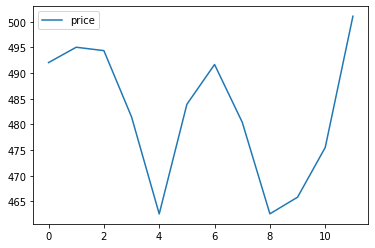

In [8]:
hawaii_month.plot()

In [9]:
alt.Chart(hawaii_month).mark_bar().encode(
    x=alt.X("month", title="Month"), 
    y=alt.Y("price", title="Average Price", scale=alt.Scale(zero=False))
    ).properties(title="Average Price by Month"
    , width=600, height=400)

alt.Chart(...)

In [10]:
cal_agg = hawaii_cal.groupby("listing_id").agg({'price': 'mean', 'adjusted_price': 'mean'}).reset_index()

In [11]:
cal_agg['price_diff'] = np.where(cal_agg.price - cal_agg.adjusted_price > 0, True, False)

In [12]:
price_diff_id = cal_agg[cal_agg['price_diff']== True].listing_id

In [13]:
price_diff_list = hawaii_cal[hawaii_cal["listing_id"].isin(price_diff_id)].copy()

In [14]:
price_diff_list["adj_gt_price"] = np.where(price_diff_list.adjusted_price > price_diff_list.price, True, False)

In [15]:
price_diff_list.adj_gt_price.value_counts()

False    568078
True        229
Name: adj_gt_price, dtype: int64

In [16]:
price_diff_cal = pd.DataFrame(price_diff_list[np.where(price_diff_list.price != price_diff_list.adjusted_price, True, False)].date.value_counts().reset_index())

In [17]:
price_diff_cal["month"] = price_diff_cal["index"].astype(str).str[5:7]

In [18]:
price_diff_month = price_diff_cal.groupby("month").agg({'date': 'sum'}).reset_index()

In [19]:
price_diff_cal.groupby("month").agg({'date': 'mean'}).reset_index()

,month,date
0,01,125.935484
1,02,133.392857
2,03,299.225806
3,04,383.333333
4,05,407.483871
5,06,455.433333
6,07,471.741935
7,08,475.806452
8,09,482.533333
9,10,477.774194


In [20]:
price_diff_month

,month,date
0,01,3904
1,02,3735
2,03,9276
3,04,11500
4,05,12632
5,06,13663
6,07,14624
7,08,14750
8,09,14476
9,10,14811


In [21]:
alt.Chart(price_diff_month).mark_bar().encode(
    x='month', y='date'
    ).properties(title="Number of Price Adjustments by Month"
    , width=600, height=400)

alt.Chart(...)